In [ ]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# KNN and Confusion Matrix
# Decision Tree, SVM, Graphviz, and cross-validation
# Random Forest

In [ ]:
# Importing dataset
df = pd.read_excel('World Bank Data.xlsx', sheet_name='Data')
df.head()

,Series Name,Series Code,Country Name,Country Code,1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,AFG,..,..,..,..,..,..,...,20497128555.697231,19134221644.732494,18116572395.077213,18753456497.815865,18053222687.412624,18799444490.112782,19955929052.149597,14259995441.075907,14497243872.133739,17233051620.111732
1,GDP (current US$),NY.GDP.MKTP.CD,Albania,ALB,..,..,..,..,..,..,...,13228147516.116798,11386853113.0189,11861199830.83956,13019726211.736889,15379509891.719603,15585105131.064415,15241458744.868845,18032010563.755798,19017242585.780338,23547179830.441257
2,GDP (current US$),NY.GDP.MKTP.CD,Algeria,DZA,13209871625.904444,15557902754.033009,17728240932.315838,20972113684.955814,26364491313.447136,33243706859.659607,...,238942664192.589996,187493855609.344635,180763839522.150818,189880896903.073303,194554483655.52774,193459662090.676819,164873415325.201477,186231205262.082367,225638456572.142761,247626161016.414459
3,GDP (current US$),NY.GDP.MKTP.CD,American Samoa,ASM,..,..,..,..,..,..,...,643000000,673000000,671000000,612000000,639000000,647000000,721000000,750000000,871000000,..
4,GDP (current US$),NY.GDP.MKTP.CD,Andorra,AND,186557081.998137,220112572.205331,227283850.831271,253997897.226968,308020261.164149,411548748.354729,...,3271685596.663211,2789881258.503616,2896610479.730765,3000162081.119757,3218419896.964102,3155149347.806392,2891001149.361105,3324647529.380999,3380612573.329216,3785067331.762496


In [ ]:
#
df.shape

(1335, 54)

In [ ]:
df.describe()

,Series Name,Series Code,Country Name,Country Code,1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
count,1332,1330,1330,1330,1330,1330,1330,1330,1330,1330,...,1330,1330,1330,1330,1330,1330,1330,1330,1330,1330
unique,7,5,266,266,530,547,557,565,578,579,...,1033,997,1001,1002,991,1000,963,963,938,862
top,GDP (current US$),NY.GDP.MKTP.CD,World,WLD,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,266,266,5,5,791,771,760,750,741,739,...,268,302,302,300,316,305,338,335,365,438


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    1332 non-null   object
 1   Series Code    1330 non-null   object
 2   Country Name   1330 non-null   object
 3   Country Code   1330 non-null   object
 4   1974 [YR1974]  1330 non-null   object
 5   1975 [YR1975]  1330 non-null   object
 6   1976 [YR1976]  1330 non-null   object
 7   1977 [YR1977]  1330 non-null   object
 8   1978 [YR1978]  1330 non-null   object
 9   1979 [YR1979]  1330 non-null   object
 10  1980 [YR1980]  1330 non-null   object
 11  1981 [YR1981]  1330 non-null   object
 12  1982 [YR1982]  1330 non-null   object
 13  1983 [YR1983]  1330 non-null   object
 14  1984 [YR1984]  1330 non-null   object
 15  1985 [YR1985]  1330 non-null   object
 16  1986 [YR1986]  1330 non-null   object
 17  1987 [YR1987]  1330 non-null   object
 18  1988 [YR1988]  1330 non-null

In [ ]:
df.replace('..', float('nan'), inplace=True)

<ipython-input-6-37ce9393a863>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('..', float('nan'), inplace=True)


In [ ]:
df = df.dropna(subset=['Country Name'])

In [ ]:
nan_counts = df.groupby('Country Name').apply(lambda x: x.isna().sum().sum()).sort_values(ascending=True)
nan_counts

<ipython-input-8-093c2e391b03>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nan_counts = df.groupby('Country Name').apply(lambda x: x.isna().sum().sum()).sort_values(ascending=True)


,0
Country Name,
United States,2
Thailand,5
"Egypt, Arab Rep.",7
Canada,7
Philippines,8
...,...
St. Martin (French part),239
British Virgin Islands,249
Gibraltar,249


In [ ]:
Country_df = df[df['Country Name'] == 'United States']

Country_df.drop(columns=['Country Name', 'Country Code', 'Series Code'], inplace=True)

Country_df_transposed = Country_df.set_index(['Series Name']).transpose()

Country_df_transposed = Country_df_transposed.reset_index()

Country_df_transposed = Country_df_transposed.rename(columns={'index': 'year'})

Country_df_transposed.columns.name = None

Country_df_transposed['year'] = Country_df_transposed['year'].str.extract(r'(\d{4})')

Country_df_transposed['year'] = Country_df_transposed['year'].astype(int)

Country_df_transposed.head()


<ipython-input-9-7ca6b18b176e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Country_df.drop(columns=['Country Name', 'Country Code', 'Series Code'], inplace=True)


,year,GDP (current US$),"Unemployment, total (% of total labor force) (national estimate)",Real interest rate (%),GDP growth (annual %),"Inflation, consumer prices (annual %)"
0,1974,1.545243e+12,5.6,1.651066,-0.540550,11.054805
1,1975,1.684904e+12,8.5,-1.281581,-0.205619,9.143147
2,1976,1.873412e+12,7.7,1.266790,5.388034,5.744813
3,1977,2.081826e+12,7.1,0.575101,4.624187,6.501684
4,1978,2.351599e+12,6.1,1.889808,5.535206,7.630964


In [ ]:
Country_df_transposed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   year                                                              50 non-null     int64  
 1   GDP (current US$)                                                 50 non-null     float64
 2   Unemployment, total (% of total labor force) (national estimate)  50 non-null     float64
 3   Real interest rate (%)                                            48 non-null     float64
 4   GDP growth (annual %)                                             50 non-null     float64
 5   Inflation, consumer prices (annual %)                             50 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 2.5 KB


In [ ]:
Country_df_transposed.dropna(inplace=True)


In [ ]:
Country_df_transposed.describe()

,year,GDP (current US$),"Unemployment, total (% of total labor force) (national estimate)",Real interest rate (%),GDP growth (annual %),"Inflation, consumer prices (annual %)"
count,48.00,4.800000e+01,48.000000,48.000000,48.000000,48.000000
mean,1997.50,1.002116e+13,6.298083,3.977806,2.677076,3.880163
std,14.00,6.357596e+12,1.605566,2.458582,2.068348,2.954835
min,1974.00,1.545243e+12,3.669000,-1.281581,-2.576500,-0.355546
25%,1985.75,4.519468e+12,5.231000,2.082517,1.869337,2.114917
50%,1997.50,8.820184e+12,5.894500,3.728679,2.790073,2.990238
75%,2009.25,1.483964e+13,7.406250,6.226474,4.041163,4.399866
max,2021.00,2.368117e+13,9.700000,8.594601,7.236453,13.549202


In [ ]:
Country_df_transposed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   year                                                              48 non-null     int64  
 1   GDP (current US$)                                                 48 non-null     float64
 2   Unemployment, total (% of total labor force) (national estimate)  48 non-null     float64
 3   Real interest rate (%)                                            48 non-null     float64
 4   GDP growth (annual %)                                             48 non-null     float64
 5   Inflation, consumer prices (annual %)                             48 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 2.6 KB


In [ ]:
renamed_columns = {'GDP growth (annual %)': 'GDP growth (annual %)',
                   'Real interest rate': 'Real interest rate (%)',
                   'Unemployment, total (% of total labor force) (national estimate)': 'Unemployment rate (%)',
                   'Inflation, consumer prices (annual %)': 'Inflation (annual %)',
                   'GDP (current US$)': 'GDP (current US$)'}


Country_df_transposed.rename(columns=renamed_columns, inplace=True)

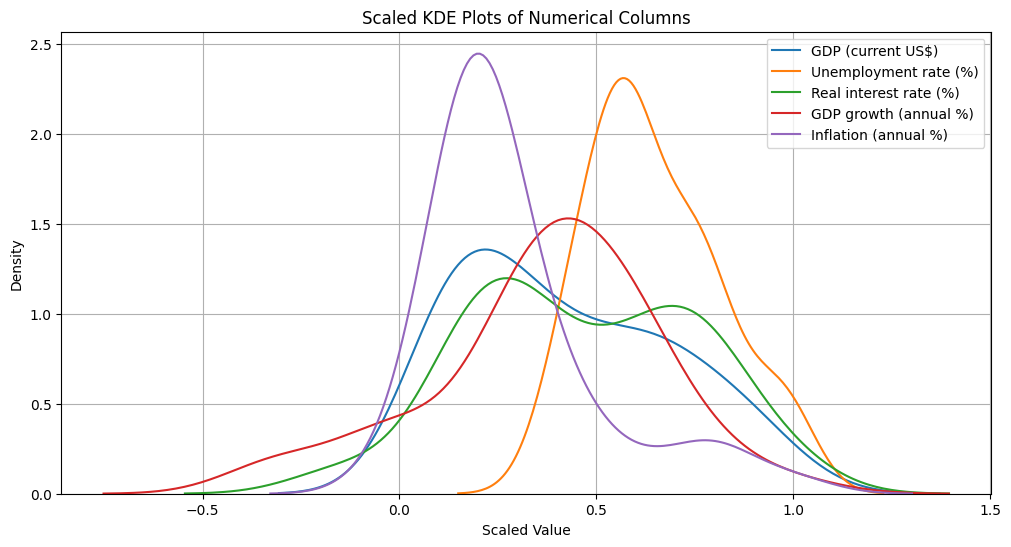

In [ ]:

numerical_columns = [col for col in Country_df_transposed.columns if col != 'year']

plt.figure(figsize=(12, 6))

for col in numerical_columns:

    scaled_data = Country_df_transposed[col] / Country_df_transposed[col].max()

    sns.kdeplot(scaled_data, label=col)

plt.title('Scaled KDE Plots of Numerical Columns')
plt.xlabel('Scaled Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

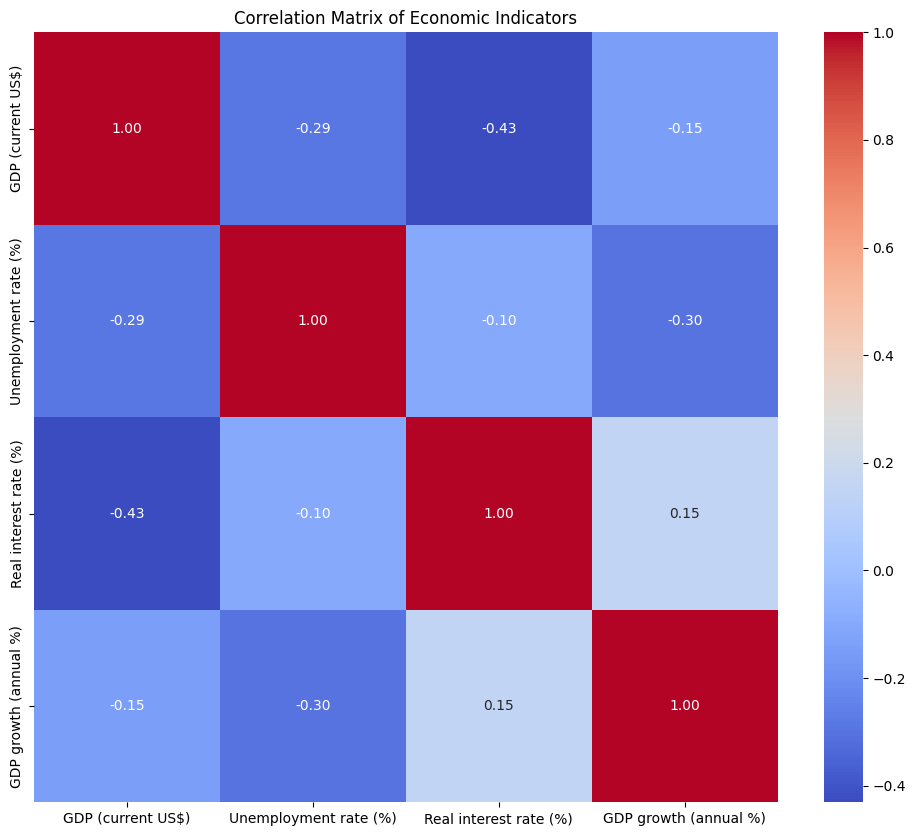

In [ ]:
correlation_matrix = Country_df_transposed.loc[:, Country_df_transposed.columns[1:5]].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Economic Indicators')
plt.show()


In [ ]:
Country_df_transposed['GDP_growth_MA'] = Country_df_transposed['GDP growth (annual %)'].rolling(window=5, center=True).mean()
Country_df_transposed['Real_interest_rate_MA'] = Country_df_transposed['Real interest rate (%)'].rolling(window=3, center=True).mean()
Country_df_transposed['Unemployment_MA'] = Country_df_transposed['Unemployment rate (%)'].rolling(window=3, center=True).mean()
Country_df_transposed['Inflation_MA'] = Country_df_transposed['Inflation (annual %)'].rolling(window=3, center=True).mean()
Country_df_transposed['GDP_current_MA'] = Country_df_transposed['GDP (current US$)'].rolling(window=3, center=True).mean()

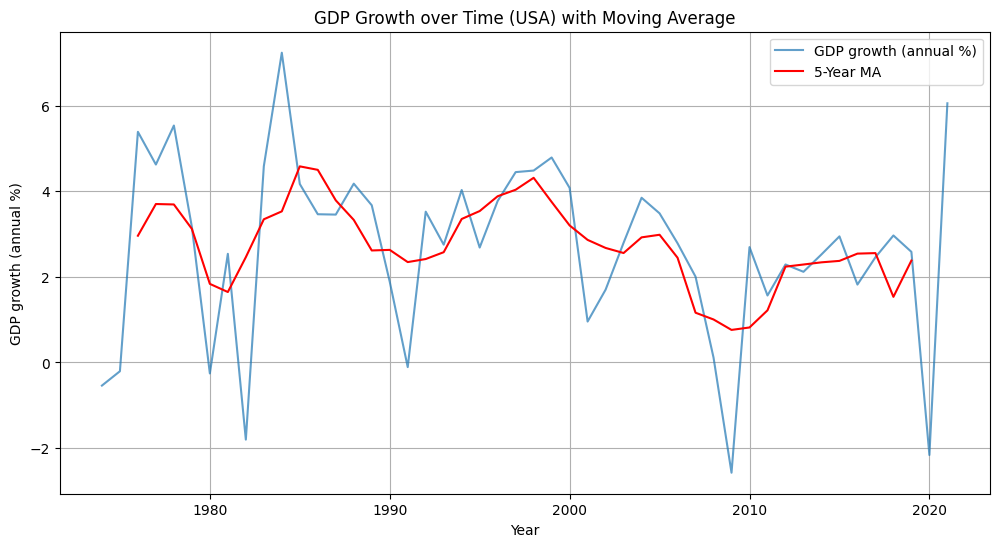

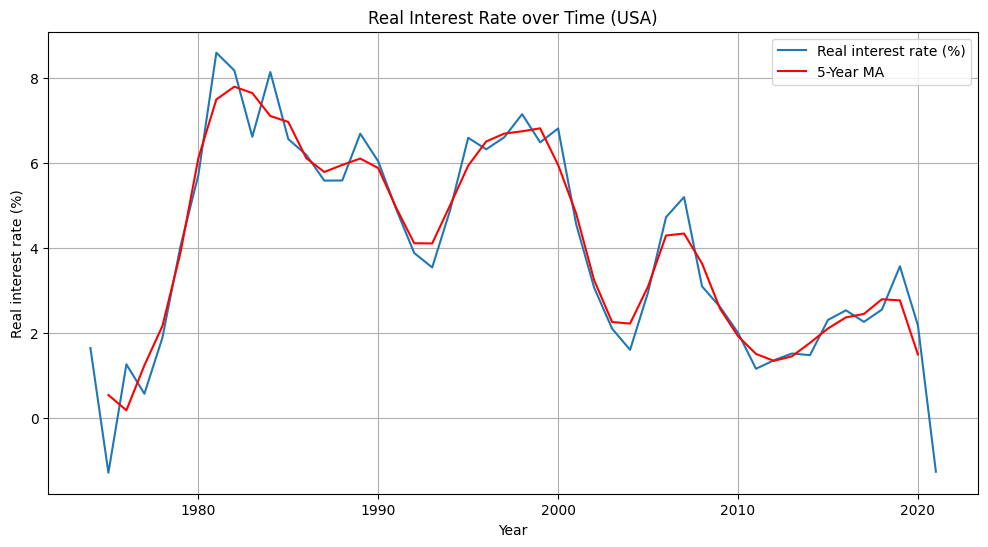

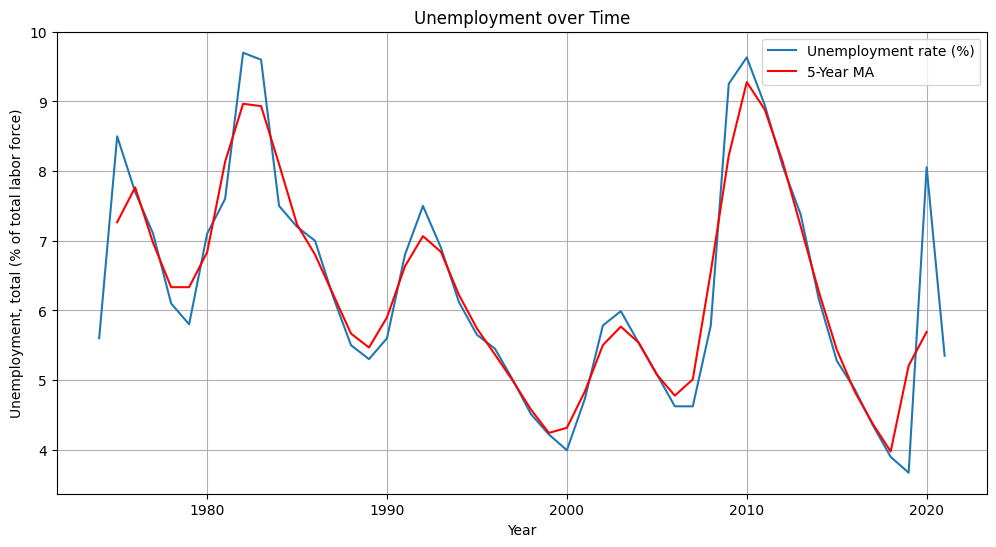

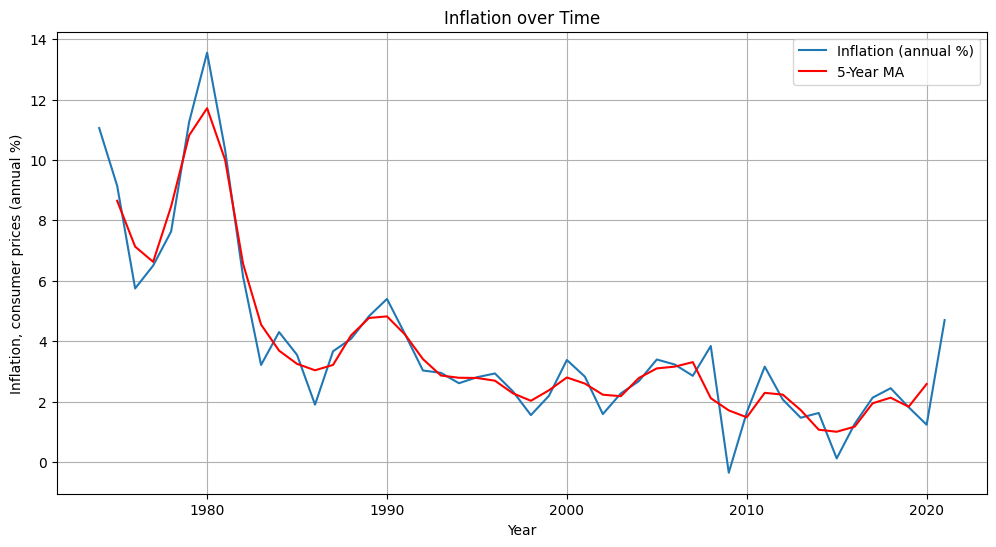

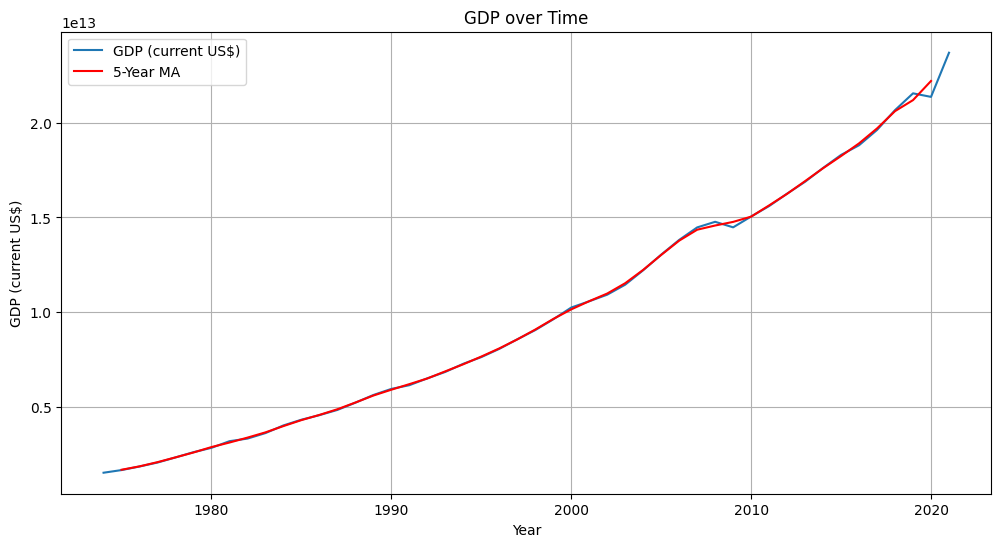

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(Country_df_transposed['year'], Country_df_transposed['GDP growth (annual %)'], label='GDP growth (annual %)', alpha=0.7)
plt.plot(Country_df_transposed['year'], Country_df_transposed['GDP_growth_MA'], label='5-Year MA', color='red')
plt.xlabel('Year')
plt.ylabel('GDP growth (annual %)')
plt.title('GDP Growth over Time (USA) with Moving Average')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(Country_df_transposed['year'], Country_df_transposed['Real interest rate (%)'], label='Real interest rate (%)')
plt.plot(Country_df_transposed['year'], Country_df_transposed['Real_interest_rate_MA'], label='5-Year MA', color='red')
plt.xlabel('Year')
plt.ylabel('Real interest rate (%)')
plt.title('Real Interest Rate over Time (USA)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(Country_df_transposed['year'], Country_df_transposed['Unemployment rate (%)'], label='Unemployment rate (%)')
plt.plot(Country_df_transposed['year'], Country_df_transposed['Unemployment_MA'], label='5-Year MA', color='red')
plt.xlabel('Year')
plt.ylabel('Unemployment, total (% of total labor force)')
plt.title('Unemployment over Time')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(Country_df_transposed['year'], Country_df_transposed['Inflation (annual %)'], label='Inflation (annual %)')
plt.plot(Country_df_transposed['year'], Country_df_transposed['Inflation_MA'], label='5-Year MA', color='red')
plt.xlabel('Year')
plt.ylabel('Inflation, consumer prices (annual %)')
plt.title('Inflation over Time')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(Country_df_transposed['year'], Country_df_transposed['GDP (current US$)'], label='GDP (current US$)')
plt.plot(Country_df_transposed['year'], Country_df_transposed['GDP_current_MA'], label='5-Year MA', color='red')
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')
plt.title('GDP over Time')
plt.legend()
plt.grid(True)
plt.show()


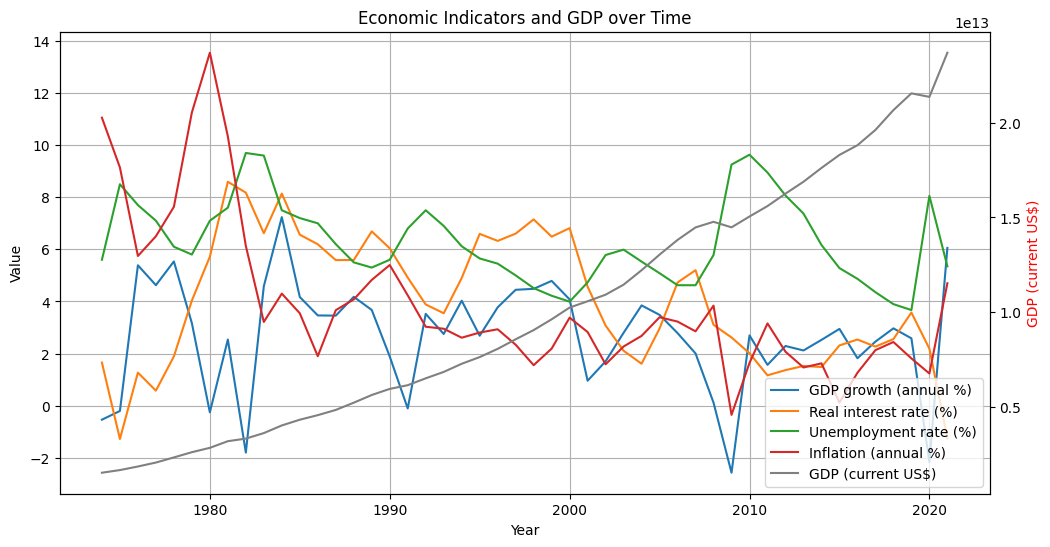

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
plt1 = ax1.plot(Country_df_transposed['year'], Country_df_transposed['GDP growth (annual %)'], label='GDP growth (annual %)')
plt2 = ax1.plot(Country_df_transposed['year'], Country_df_transposed['Real interest rate (%)'], label='Real interest rate (%)')
plt3 = ax1.plot(Country_df_transposed['year'], Country_df_transposed['Unemployment rate (%)'], label='Unemployment rate (%)')
plt4 = ax1.plot(Country_df_transposed['year'], Country_df_transposed['Inflation (annual %)'], label='Inflation (annual %)')
plt5 = ax2.plot(Country_df_transposed['year'], Country_df_transposed['GDP (current US$)'], label='GDP (current US$)', color='gray')
plt_c = plt1 + plt2 + plt3 + plt4 + plt5
plt_c_label = [p.get_label() for p in plt_c]
ax1.legend(plt_c, plt_c_label, loc='lower right')
ax1.grid(True)
ax1.set_xlabel('Year')
ax1.set_ylabel('Value')
ax1.set_title('Economic Indicators and GDP over Time')
ax2.set_ylabel('GDP (current US$)', color='red')
plt.show()

In [ ]:
# Prepare the data
X = Country_df_transposed[['GDP growth (annual %)', 'Real interest rate (%)', 'Inflation (annual %)', 'GDP (current US$)']]
y = Country_df_transposed['Unemployment rate (%)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print metrics
print(f"Decision Tree Regressor Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Percentage Error: {mape}%")


Decision Tree Regressor Metrics:
Mean Squared Error: 2.1890053909867317
Mean Absolute Error: 1.2102465142896544
Root Mean Squared Error: 1.4795287732878775
R-squared: 0.061993972228391536
Mean Absolute Percentage Error: 23.80251930744981%


In [ ]:
# Prepare the data
X = Country_df_transposed[['GDP growth (annual %)', 'Real interest rate (%)', 'Inflation (annual %)', 'GDP (current US$)']]
y = Country_df_transposed['Unemployment rate (%)']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train a decision tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print metrics
print(f"Decision Tree Regressor Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Percentage Error: {mape}%")


Decision Tree Regressor Metrics:
Mean Squared Error: 2.6910111
Mean Absolute Error: 1.3181
Root Mean Squared Error: 1.6404301570015103
R-squared: -0.15311942263535805
Mean Absolute Percentage Error: 22.062030196262842%


In [ ]:
# Prepare the data
X = Country_df_transposed[['GDP growth (annual %)', 'Real interest rate (%)', 'Inflation (annual %)', 'GDP (current US$)']]
y = Country_df_transposed['Unemployment rate (%)']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (same evaluation metrics)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print metrics
print(f"Random Forest Regressor Metrics:")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Percentage Error: {mape}%")


Random Forest Regressor Metrics:
Mean Squared Error: 1.6154838445800053
Mean Absolute Error: 1.168440000000002
Root Mean Squared Error: 1.2710168545617344
R-squared: 0.3077524659267127
Mean Absolute Percentage Error: 22.741739814092842%


In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Random Forest Regressor Metrics (Best Model):")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Percentage Error: {mape}%")


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Regressor Metrics (Best Model):
Mean Squared Error: 1.6206167926350012
Mean Absolute Error: 1.1473930000000006
Root Mean Squared Error: 1.273034482107614
R-squared: 0.30555295731168153
Mean Absolute Percentage Error: 22.40480152484232%


In [ ]:
# Stopping in runtime
# # Prepare the data
# X = Country_df_transposed[['GDP growth (annual %)', 'Real interest rate (%)', 'Inflation (annual %)', 'GDP (current US$)']]
# y = Country_df_transposed['Unemployment rate (%)']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create and train an SVR model
# svr_model = SVR(kernel='linear', C=1.0, epsilon=0.2)
# svr_model.fit(X_train, y_train)

# # Make predictions
# y_pred = svr_model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)
# mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# print(f"SVR Metrics:")
# print(f"Mean Squared Error: {mse}")
# print(f"Mean Absolute Error: {mae}")
# print(f"Root Mean Squared Error: {rmse}")
# print(f"R-squared: {r2}")
# print(f"Mean Absolute Percentage Error: {mape}%")


Comments:
Have proper alignment and spacing
Give Brief about the graphs you have having in the report and how they are aligned to your analysis
Some explanations are not clear, do not just state things. Elaborate
Results are not clear, what did you identify, how did you identify. Explain
Aishwarya Gade, Apr 1 at 10:25pm
Feedback:

Expand the report with more details and depth.

Use larger fonts in all figures for better readability.

In the coding sections, include detailed markdown explanations alongside the code cells to enhance clarity.

Overall, there is room for improvement.

In [ ]:
#
subset_columns = [
    'year',
    'GDP (current US$)',
    'Unemployment rate (%)',
    'Real interest rate (%)',
    'GDP growth (annual %)',
    'Inflation (annual %)'
]

country_subset = Country_df_transposed[subset_columns]

<ipython-input-35-16fa706ef78f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_subset['unemployment_rate'] = country_subset[
<ipython-input-35-16fa706ef78f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_subset['unemployment_class'] = country_subset['unemployment_rate'].apply(label_unemployment)


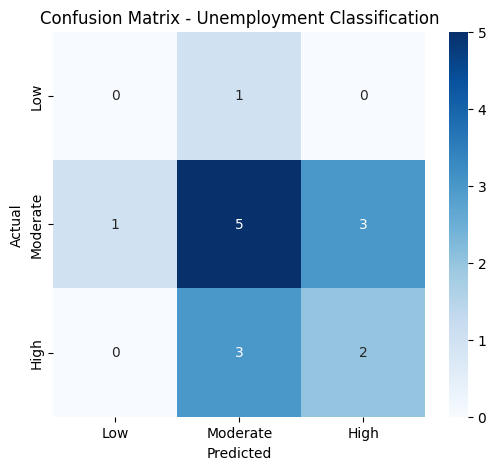

Classification Report:
              precision    recall  f1-score   support

        High      0.400     0.400     0.400         5
         Low      0.000     0.000     0.000         1
    Moderate      0.556     0.556     0.556         9

    accuracy                          0.467        15
   macro avg      0.319     0.319     0.319        15
weighted avg      0.467     0.467     0.467        15



In [ ]:
# Classification

# Assuming your dataframe is named df and already has these columns:
# ['year', 'GDP (current US$)', 'Unemployment rate (%)', 'Real interest rate (%)',
#  'GDP growth (annual %)', 'Inflation (annual %)', 'unemployment_rate', 'unemployment_class']
def label_unemployment(rate):
    if rate < 4:
        return 'Low'
    elif 4 <= rate < 7:
        return 'Moderate'
    else:
        return 'High'

country_subset['unemployment_rate'] = country_subset[
    'Unemployment rate (%)'
].astype(float)

country_subset['unemployment_class'] = country_subset['unemployment_rate'].apply(label_unemployment)


# Step 1: Drop unnecessary columns
X = country_subset.drop(columns=['year', 'Unemployment rate (%)', 'unemployment_class', 'unemployment_rate'])
y = country_subset['unemployment_class']

# Step 2: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Step 4: SMOTE - Oversample minority classes in training set
# Setting k_neighbors to a smaller value to avoid the error
smote = SMOTE(random_state=42, k_neighbors=min(y_train.value_counts()) - 1 if min(y_train.value_counts()) > 1 else 1)
# If any minority class has 1 or 0 sample set k_neighbors to 1 else set it to (minority_samples-1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 5: KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_smote, y_train_smote)

# Step 6: Prediction
y_pred = knn.predict(X_test)

# Step 7: Confusion Matrix and Evaluation
cm = confusion_matrix(y_test, y_pred, labels=['Low', 'Moderate', 'High'])

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Moderate', 'High'],
            yticklabels=['Low', 'Moderate', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Unemployment Classification')
plt.show()

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

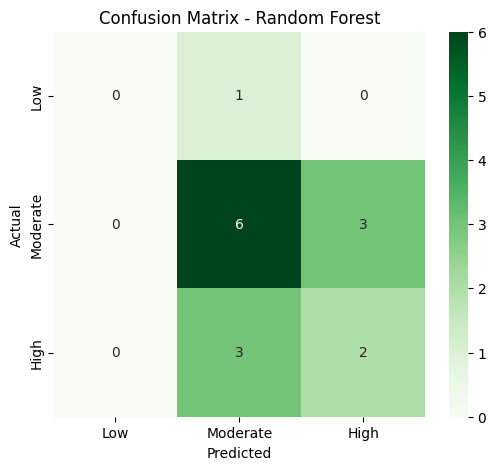

Classification Report (Random Forest):
              precision    recall  f1-score   support

        High      0.400     0.400     0.400         5
         Low      0.000     0.000     0.000         1
    Moderate      0.600     0.667     0.632         9

    accuracy                          0.533        15
   macro avg      0.333     0.356     0.344        15
weighted avg      0.493     0.533     0.512        15



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Step 5 (Alternative): Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Step 6: Prediction
y_pred_rf = rf.predict(X_test)

# Step 7: Confusion Matrix and Evaluation
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=['Low', 'Moderate', 'High'])

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Low', 'Moderate', 'High'],
            yticklabels=['Low', 'Moderate', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Print Classification Report
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, digits=3))


In [ ]:
importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False)


,Feature,Importance
0,GDP (current US$),0.470937
1,Real interest rate (%),0.285902
3,Inflation (annual %),0.143422
2,GDP growth (annual %),0.099738


In [ ]:
# Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Step 1: Define features and target
X = country_subset.drop(columns=['year', 'Unemployment rate (%)', 'unemployment_rate', 'unemployment_class'])
y = country_subset['Unemployment rate (%)']
# Step 2: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 4a: KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)

# Step 4b: Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Step 5: Evaluation Function
def evaluate(y_true, y_pred, model_name):
    print(f"\n📊 {model_name} Results:")
    print(f"R² Score     : {r2_score(y_true, y_pred):.3f}")
    print(f"RMSE         : {np.sqrt(mean_squared_error(y_true, y_pred)):.3f}")
    print(f"MAE          : {mean_absolute_error(y_true, y_pred):.3f}")

# Evaluate both models
evaluate(y_test, y_pred_knn, "KNN Regressor")
evaluate(y_test, y_pred_rf, "Random Forest Regressor")



📊 KNN Regressor Results:
R² Score     : 0.539
RMSE         : 1.159
MAE          : 0.906

📊 Random Forest Regressor Results:
R² Score     : 0.487
RMSE         : 1.222
MAE          : 1.073


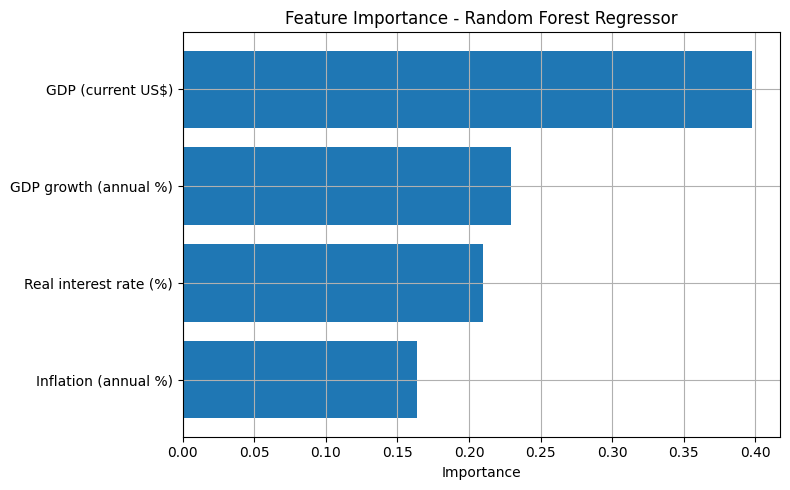

In [ ]:
feature_names = X.columns
importances = rf_reg.feature_importances_

# Create DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8,5))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest Regressor')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


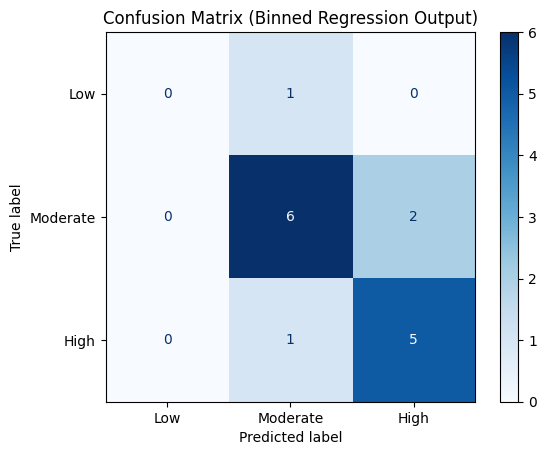

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Binning function
def categorize(rate):
    if rate < 4:
        return 'Low'
    elif 4 <= rate < 7:
        return 'Moderate'
    else:
        return 'High'

# Apply to actual and predicted values
y_test_binned = y_test.apply(categorize)
y_pred_binned_rf = pd.Series(y_pred_rf).apply(categorize)

# Confusion Matrix
labels = ['Low', 'Moderate', 'High']
cm = confusion_matrix(y_test_binned, y_pred_binned_rf, labels=labels)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Binned Regression Output)')
plt.show()
